In [2]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
csv_path = Path("outputs/Fires_2021.csv")
df_2021 = pd.read_csv(csv_path)

df_2021

,Year,Alarm Date,Containment Date,Cause #,GIS Calculated Acres,Cause
0,2021,9/11/2021,9/12/2021,14,24.354670,Unknown / Unidentified
1,2021,9/12/2021,9/13/2021,10,70.800700,Vehicle
2,2021,10/5/2021,10/5/2021,14,41.598870,Unknown / Unidentified
3,2021,8/12/2021,8/12/2021,14,15.827520,Unknown / Unidentified
4,2021,5/8/2021,5/8/2021,14,60.395580,Unknown / Unidentified
...,...,...,...,...,...,...
382,2021,5/5/2021,5/5/2021,5,4.767107,Debris
383,2021,6/21/2021,6/21/2021,14,6.112738,Unknown / Unidentified
384,2021,6/30/2021,7/3/2021,14,29.939200,Unknown / Unidentified
385,2021,7/8/2021,7/8/2021,14,6.567343,Unknown / Unidentified


In [4]:
# Convert 'Alarm Date' to datetime
df_2021['Alarm Date'] = pd.to_datetime(df_2021['Alarm Date'])

# Extract month name
df_2021['Month'] = df_2021['Alarm Date'].dt.strftime('%B')

# Group by month and calculate the number of incidents and total acres burned
monthly_summary_2021 = df_2021.groupby('Month').agg({
    'Alarm Date': 'count',
    'GIS Calculated Acres': 'sum'
}).rename(columns={'Alarm Date': 'Number of Incidents', 'GIS Calculated Acres': 'Total Acres Burned'}).reset_index()

# To ensure the months are in calendar order, you can set the month column as a Categorical type
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_summary_2021['Month'] = pd.Categorical(monthly_summary_2021['Month'], categories=months_order, ordered=True)
monthly_summary_2021 = monthly_summary_2021.sort_values('Month')

# Round 'Total Acres Burned' to 2 decimal places
monthly_summary_2021['Total Acres Burned'] = monthly_summary_2021['Total Acres Burned'].round(2)

# Display the summary
print(monthly_summary_2021)

        Month  Number of Incidents  Total Acres Burned
4     January                   28             2377.81
3    February                    5              148.21
7       March                    9             1276.00
0       April                   38             1587.84
8         May                   48            11356.31
6        June                   88            67727.95
5        July                   71          1704910.92
1      August                   58           508966.58
11  September                   25           196288.98
10    October                   14            17741.66
9    November                    2              139.93
2    December                    1               31.70


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


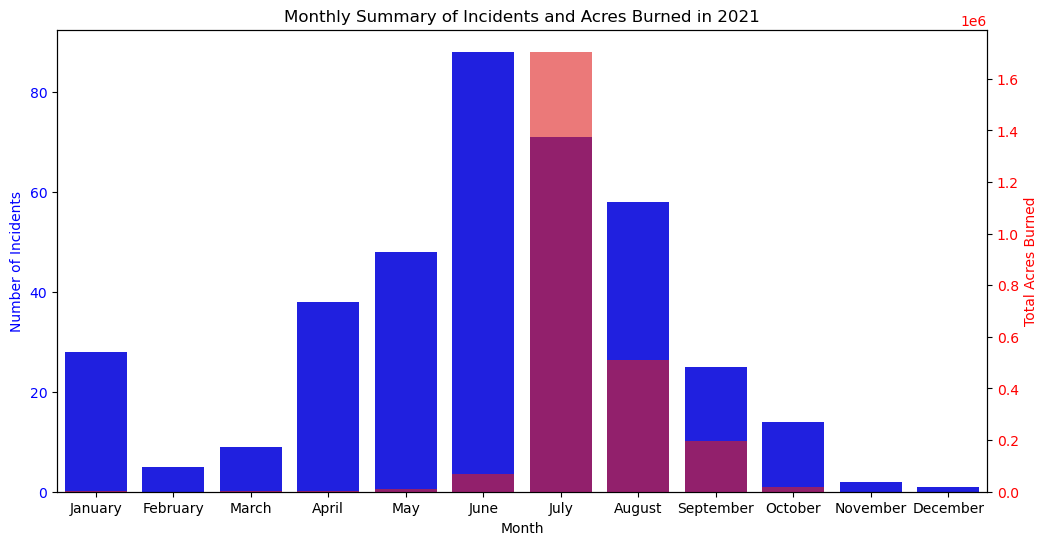

In [6]:
# Plotting a grouped bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Number of Incidents
sns.barplot(data=monthly_summary_2021, x='Month', y='Number of Incidents', color='b', ax=ax1)
ax1.set_ylabel('Number of Incidents', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a second y-axis to plot Total Acres Burned
ax2 = ax1.twinx()
sns.barplot(data=monthly_summary_2021, x='Month', y='Total Acres Burned', color='r', alpha=0.6, ax=ax2)
ax2.set_ylabel('Total Acres Burned', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Monthly Summary of Incidents and Acres Burned in 2021')
plt.show()